# Calculate bonding curve params

## Optimize for initial and final price

In [153]:
import math
from scipy.optimize import fsolve
import scipy.integrate as integrate

x_initial = 3_000_000  # Initial market cap in USD
x_final = 300_000_000  # Final market cap in USD
initial_supply = 1_000_000_000_000
initial_price = x_initial/initial_supply  
graduation_price = x_final/initial_supply#0.0011  

# Define the bonding curve equations
def equations(vars):
    a, b = vars
    eq1 = a * math.exp(b * x_initial) - initial_price
    eq2 = a * math.exp(b * x_final) - graduation_price
    return [eq1, eq2]

# Initial guess for a and b
initial_guess = [0.001, 0.0000001]

# Solve the equations to find a and b
a_opt, b_opt = fsolve(equations, initial_guess)

print(f"Tuned a parameter: {a_opt}")
print(f"Tuned b parameter: {b_opt}")
a=a_opt
b=b_opt

# Market cap at graduation
mc_graduation = x_final

# Calculate the total USD invested using the integral of the bonding curve
total_usd_invested = (a / b) * (math.exp(b * mc_graduation) - 1)

# Alternatively, calculate tokens sold more accurately using the exponential growth
tokens_sold = total_usd_invested / (a * math.exp(b * mc_graduation / 2))  # Midpoint approximation for average price

# Calculate the remaining supply of tokens
remaining_supply = initial_supply - tokens_sold

def price_function(x):
    return a * math.exp(b * x)

# Integrate the price function from x_initial to x_final
total_usdt, _ = integrate.quad(price_function, x_initial, x_final)

print(f"Total USD invested up to {mc_graduation} USD market cap: {total_usd_invested}")
print(f"USD amount required for graduation of token: {total_usdt}")
print(f"Number of tokens sold up to {mc_graduation} USD market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")
print(f"Initial Price: {a_opt*math.exp(b_opt*x_initial)}")
print(f"Final Price: {a_opt*math.exp(b_opt*x_final)}")
print(f"Avg price of token sold: {total_usd_invested/tokens_sold}")


Tuned a parameter: 2.8636453699855022e-06
Tuned b parameter: 1.5505623521845414e-08
Total USD invested up to 300000000 USD market cap: 19163.134859516405
USD amount required for graduation of token: 19154.340977101918
Number of tokens sold up to 300000000 USD market cap: 653802100.1849905
Remaining supply of tokens: 999346197899.8151
Initial Price: 3e-06
Final Price: 0.0002999999999999989
Avg price of token sold: 2.93102987189767e-05


In [156]:
import math
from scipy.optimize import fsolve
import scipy.integrate as integrate

# Constants
x_initial = 3_000_000  # Initial market cap in USD
x_final = 300_000_000  # Final market cap in USD
initial_supply = 1_000_000_000_000
initial_price = x_initial/initial_supply  # Initial price per token in USD
graduation_price = x_final/initial_supply  # Target graduation price per token in USD
target_usd_invested = 400_000  # Target total USD invested

# Define the bonding curve equations
def equations(vars):
    a, b = vars
    eq1 = a * math.exp(b * x_initial) - initial_price
    eq2 = a * math.exp(b * x_final) - graduation_price
    return [eq1, eq2]

# Initial guess for a and b
initial_guess = [0.001, 0.0000001]

# Solve the equations to find initial a and b
a_opt, b_opt = fsolve(equations, initial_guess)

print(f"Initial a parameter: {a_opt}")
print(f"Initial b parameter: {b_opt}")

# Function to calculate total USD invested
def total_usd_invested(a, b):
    return (a / b) * (math.exp(b * x_final) - math.exp(b * x_initial))

# Function to adjust a and b to meet target total USD invested
def adjust_parameters(target_usd_invested):
    def adjustment_equations(vars):
        a, b = vars
        total_invested = total_usd_invested(a, b)
        return [a * math.exp(b * x_initial) - initial_price, total_invested - target_usd_invested]
    
    adjusted_a, adjusted_b = fsolve(adjustment_equations, [a_opt, b_opt])
    return adjusted_a, adjusted_b

# Adjust parameters
a_final, b_final = adjust_parameters(target_usd_invested)

# Calculate the total USD invested using the final a and b
total_usd_invested_final = total_usd_invested(a_final, b_final)

# Calculate the number of tokens sold more accurately using the exponential growth
tokens_sold_final = total_usd_invested_final / ((a_final * math.exp(b_final * x_initial) + a_final * math.exp(b_final * x_final)) / 2)  # Average price

# Calculate the remaining supply of tokens
remaining_supply_final = initial_supply - tokens_sold_final

# Define the price function for integration
def price_function(x):
    return a_final * math.exp(b_final * x)

# Integrate the price function from x_initial to x_final
total_usdt_integral, _ = integrate.quad(price_function, x_initial, x_final)

print(f"Final a parameter: {a_final}")
print(f"Final b parameter: {b_final}")
print(f"Total USD invested up to {x_final} USD market cap: {total_usd_invested_final}")
print(f"USD amount required for graduation of token: {total_usdt_integral}")
print(f"Number of tokens sold up to {x_final} USD market cap: {tokens_sold_final}")
print(f"Remaining supply of tokens: {remaining_supply_final}")
print(f"Initial Price: {a_final * math.exp(b_final * x_initial)}")
print(f"Final Price: {a_final * math.exp(b_final * x_final)}")
print(f"Avg price of token sold: {total_usd_invested_final / tokens_sold_final}")


Initial a parameter: 2.8636453699855022e-06
Initial b parameter: 1.5505623521845414e-08
Final a parameter: 2.8636453699855022e-06
Final b parameter: 1.5505623521845414e-08
Total USD invested up to 300000000 USD market cap: 19154.34097710191
USD amount required for graduation of token: 19154.340977101918
Number of tokens sold up to 300000000 USD market cap: 126431293.57823089
Remaining supply of tokens: 999873568706.4218
Initial Price: 3e-06
Final Price: 0.0002999999999999989
Avg price of token sold: 0.00015149999999999945


## Experiments

In [159]:
import math
from scipy.optimize import minimize
import scipy.integrate as integrate

x_initial = 750  # Initial market cap in USD
x_final = 750000  # Final market cap in USD
initial_supply = 1_000_000_000_000
initial_price = x_initial / initial_supply  
graduation_price = x_final / initial_supply  # 0.0011  
target_usd_invested = 100  # Target USD amount required for graduation

# Define the objective function
def objective(vars):
    a, b = vars
    
    # Price function
    def price_function(x):
        return a * math.exp(b * x)
    
    # Integrate the price function from x_initial to x_final
    total_usd_invested, _ = integrate.quad(price_function, x_initial, x_final)
    
    # Calculate penalties for initial and graduation prices
    initial_price_penalty = (a * math.exp(b * x_initial) - initial_price) ** 2
    graduation_price_penalty = (a * math.exp(b * x_final) - graduation_price) ** 2
    
    # Calculate penalty for deviation from target USD invested
    usd_invested_penalty = (total_usd_invested - target_usd_invested) ** 2
    
    return initial_price_penalty + graduation_price_penalty + usd_invested_penalty

# Initial guess for a and b
initial_guess = [0.001, 0.0000001]

# Solve the optimization problem to find a and b
solution = minimize(objective, initial_guess, bounds=[(1e-10, 1e-3), (1e-10, 1e-6)])
a_opt, b_opt = solution.x

print(f"Tuned a parameter: {a_opt}")
print(f"Tuned b parameter: {b_opt}")
a = a_opt
b = b_opt

# Market cap at graduation
mc_graduation = x_final

# Calculate the total USD invested using the integral of the bonding curve
total_usd_invested = (a / b) * (math.exp(b * mc_graduation) - 1)

# Alternatively, calculate tokens sold more accurately using the exponential growth
tokens_sold = total_usd_invested / (a * math.exp(b * mc_graduation / 2))  # Midpoint approximation for average price

# Calculate the remaining supply of tokens
remaining_supply = initial_supply - tokens_sold

def price_function(x):
    return a * math.exp(b * x)

# Integrate the price function from x_initial to x_final
total_usdt, _ = integrate.quad(price_function, x_initial, x_final)

print(f"Total USD invested up to {mc_graduation} USD market cap: {total_usd_invested}")
print(f"USD amount required for graduation of token: {total_usdt}")
print(f"Number of tokens sold up to {mc_graduation} USD market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")
print(f"Initial Price: {a_opt * math.exp(b_opt * x_initial)}")
print(f"Final Price: {a_opt * math.exp(b_opt * x_final)}")
print(f"Avg price of token sold: {total_usd_invested / tokens_sold}")

Tuned a parameter: 0.0001334567901858337
Tuned b parameter: 1e-10
Total USD invested up to 750000 USD market cap: 100.09634620531796
USD amount required for graduation of token: 99.99625360904496
Number of tokens sold up to 750000 USD market cap: 750000.0001748832
Remaining supply of tokens: 999999249999.9999
Initial Price: 0.00013345680019509335
Final Price: 0.00013346679982045425
Avg price of token sold: 0.00013346179490930364


In [146]:
initial_supply* 6.61591855639723e-05

66159185.563972294

## Optmize for Graduation Liquidty USD amount

In [150]:
import math
from scipy.optimize import minimize
import scipy.integrate as integrate

# Initial and final market cap values
x_initial = 3_000_000  # Initial market cap in USD
x_final = 300_000_000  # Final market cap in USD

# Desired conditions
total_usd_desired = 55_000  # Desired total USD invested

# Define the objective function to minimize
def objective(vars):
    a, b = vars
    total_usd_invested = (a / b) * (math.exp(b * x_final) - math.exp(b * x_initial))
    return abs(total_usd_invested - total_usd_desired)

# Initial guess for a and b
initial_guess = [0.0001, 0.00000001]

# Solve the optimization problem to find a and b
result = minimize(objective, initial_guess, method='Nelder-Mead')
a_opt, b_opt = result.x

print(f"Tuned a parameter: {a_opt}")
print(f"Tuned b parameter: {b_opt}")

a = a_opt
b = b_opt

# Market cap at graduation
mc_graduation = x_final

# Calculate the total USD invested using the integral of the bonding curve
total_usd_invested = (a / b) * (math.exp(b * mc_graduation) - math.exp(b * x_initial))

# Calculate tokens sold more accurately using the exponential growth
initial_supply = 1_000_000_000_000
tokens_sold = total_usd_invested / (a * math.exp(b * (x_initial + x_final) / 2))  # Midpoint approximation for average price

# Calculate the remaining supply of tokens
remaining_supply = initial_supply - tokens_sold

def price_function(x):
    return a * math.exp(b * x)

# Integrate the price function from x_initial to x_final
total_usdt, _ = integrate.quad(price_function, x_initial, x_final)

print(f"Total USD invested up to {mc_graduation} USD market cap: {total_usd_invested}")
print(f"USD amount required for graduation of token: {total_usdt}")
print(f"Number of tokens sold up to {mc_graduation} USD market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")
print(f"Initial Price: {a_opt*math.exp(b_opt*x_initial)}")
print(f"Final Price from MC: {a_opt*math.exp(b_opt*x_final)}")
print(f"Avg price of token sold: {total_usdt/tokens_sold}")

Tuned a parameter: 0.000110970839907702
Tuned b parameter: 3.1422965522028977e-09
Total USD invested up to 300000000 USD market cap: 54999.99995281517
USD amount required for graduation of token: 54999.99995281517
Number of tokens sold up to 300000000 USD market cap: 307896310.61097246
Remaining supply of tokens: 999692103689.389
Initial Price: 0.00011202189608229675
Final Price from MC: 0.0002848482063051874
Avg price of token sold: 0.00017863156542433458


## Optimize for both

## Plot curve

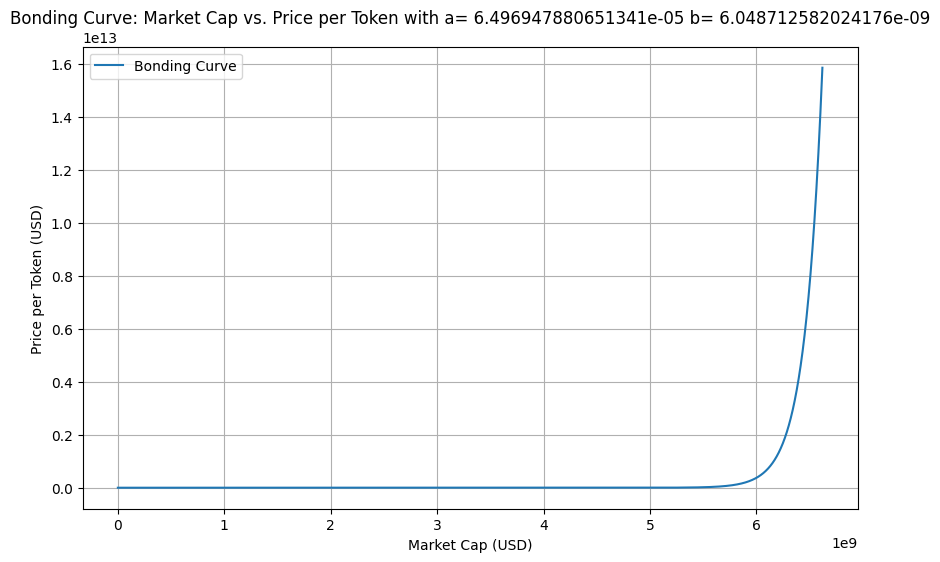

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Bonding curve function
def bonding_curve(x, a, b):
    return a * np.exp(b * x)

# Initial conditions
initial_mc = x_initial  # Initial market cap in USD
tokens_bought = np.linspace(1, 10**14, 10000)  # Range of tokens bought

# Calculate the initial price
initial_price = bonding_curve(initial_mc, a_opt, b_opt)

# Calculate market cap changes and new prices
market_caps = initial_mc + tokens_bought * initial_price
new_prices = bonding_curve(market_caps, a_opt, b_opt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(market_caps, new_prices, label='Bonding Curve')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per Token (USD)')
plt.title(f'Bonding Curve: Market Cap vs. Price per Token with a= {a_opt} b= {b_opt}')
plt.legend()
plt.grid(True)
plt.show()

Tuned a parameter: 0.000118880659156079
Tuned b parameter: 2.181491948202397e-09
Total USD invested up to 300000000 USD market cap: 49999.99987921791
USD amount required for graduation of token: 49999.9998792179
Number of tokens sold up to 300000000 USD market cap: 302222084.4742156
Remaining supply of tokens: 999697777915.5258


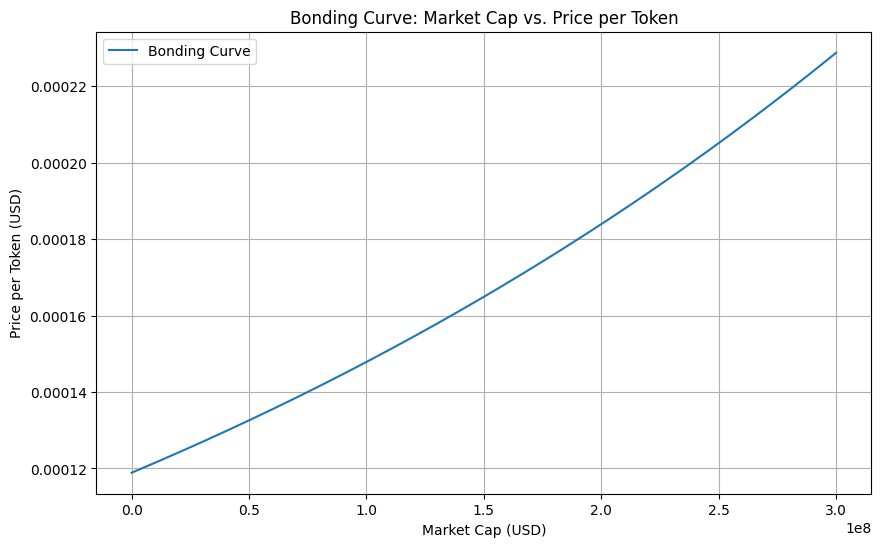

In [172]:
import math
from scipy.optimize import minimize
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

# Initial and final market cap values
x_initial = 3_000_000  # Initial market cap in USD
x_final = 300_000_000  # Final market cap in USD

# Desired conditions
total_usd_desired = 50_000  # Desired total USD invested

# Define the objective function to minimize
def objective(vars):
    a, b = vars
    total_usd_invested = (a / b) * (math.exp(b * x_final) - math.exp(b * x_initial))
    return abs(total_usd_invested - total_usd_desired)

# Initial guess for a and b
initial_guess = [0.0001, 0.0000001]

# Solve the optimization problem to find a and b
result = minimize(objective, initial_guess, method='Nelder-Mead')
a_opt, b_opt = result.x

print(f"Tuned a parameter: {a_opt}")
print(f"Tuned b parameter: {b_opt}")

a = a_opt
b = b_opt

# Market cap at graduation
mc_graduation = x_final

# Calculate the total USD invested using the integral of the bonding curve
total_usd_invested = (a / b) * (math.exp(b * mc_graduation) - math.exp(b * x_initial))

# Calculate tokens sold more accurately using the exponential growth
initial_supply = 1_000_000_000_000
tokens_sold = total_usd_invested / (a * math.exp(b * (x_initial + x_final) / 2))  # Midpoint approximation for average price

# Calculate the remaining supply of tokens
remaining_supply = initial_supply - tokens_sold

def price_function(x):
    return a * np.exp(b * x)

# Integrate the price function from x_initial to x_final
total_usdt, _ = integrate.quad(lambda x: price_function(x), x_initial, x_final)

print(f"Total USD invested up to {mc_graduation} USD market cap: {total_usd_invested}")
print(f"USD amount required for graduation of token: {total_usdt}")
print(f"Number of tokens sold up to {mc_graduation} USD market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")

# Plot the bonding curve
market_caps = np.linspace(0, mc_graduation, 1000)
prices = price_function(market_caps)

plt.figure(figsize=(10, 6))
plt.plot(market_caps, prices, label='Bonding Curve')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per Token (USD)')
plt.title('Bonding Curve: Market Cap vs. Price per Token')
plt.legend()
plt.grid(True)
plt.show()


## Calculate Tokens Purchased/Sold

In [152]:
import math

def calculate_tokens_purchased(a, b, eth_amount, eth_price, initial_market_cap):
    """
    Calculate the number of tokens purchased for a given amount of ETH.
    
    Parameters:
    a (float): Initial price parameter of the bonding curve.
    b (float): Aggressiveness parameter of the bonding curve.
    eth_amount (float): Amount of ETH used for the trade.
    eth_price (float): Price of 1 ETH in USD.
    initial_market_cap (float): Initial market cap before the trade.

    Returns:
    float: Number of tokens purchased.
    """
    # Convert ETH amount to USD value
    usd_value = eth_amount * eth_price
    
    # Calculate the final market cap after the trade
    final_market_cap_exp = (usd_value * b / a) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    
    # Calculate the number of tokens purchased
    tokens_purchased = final_market_cap - initial_market_cap
    
    return tokens_purchased,final_market_cap

def calculate_eth_received(a, b, tokens_sold, eth_price, initial_market_cap):
    """
    Calculate the amount of ETH received for selling a given number of tokens.
    
    Parameters:
    a (float): Initial price parameter of the bonding curve.
    b (float): Aggressiveness parameter of the bonding curve.
    tokens_sold (float): Number of tokens sold.
    eth_price (float): Price of 1 ETH in USD.
    initial_market_cap (float): Initial market cap before the trade.

    Returns:
    float: Amount of ETH received.
    """
    # Calculate the final market cap after the sale
    final_market_cap = initial_market_cap - tokens_sold
    
    # Calculate the USD value received from selling the tokens
    usd_value_received = (a / b) * (math.exp(b * initial_market_cap) - math.exp(b * final_market_cap))
    
    # Convert the USD value to ETH
    eth_received = usd_value_received / eth_price
    
    return eth_received,final_market_cap

# Parameters
a = a_opt  # Initial price parameter
b = b_opt  # Aggressiveness parameter
eth_amount = 1  # Amount of ETH used for the trade
eth_price = 2000  # Price of 1 ETH in USD
initial_market_cap = 1000000  # Initial market cap before the trade
 # Number of tokens sold

# Calculate tokens purchased
tokens_purchased,final_market_cap = calculate_tokens_purchased(a, b, eth_amount, eth_price, initial_market_cap)
print(f"Tokens purchased for {eth_amount} ETH: {tokens_purchased}")
print(f"Avg ETH Buy Price per token: {eth_amount/tokens_purchased}")
print(f"New MC after this purchase: {final_market_cap}")


# Calculate ETH received for selling tokens
tokens_sold = tokens_purchased
initial_market_cap=final_market_cap
eth_received,final_market_cap = calculate_eth_received(a, b, tokens_sold, eth_price, initial_market_cap)
print(f"ETH received for selling {tokens_sold} tokens: {eth_received}")
print(f"Avg ETH Sell Price per token: {eth_amount/tokens_purchased}")
print(f"New MC after this purchase: {final_market_cap}")



Tokens purchased for 1 ETH: 17477380.047915608
Avg ETH Buy Price per token: 5.721681380495369e-08
New MC after this purchase: 18477380.047915608
ETH received for selling 17477380.047915608 tokens: 0.999999999999998
Avg ETH Sell Price per token: 5.721681380495369e-08
New MC after this purchase: 1000000.0


## Stress test

In [161]:
import math

def calculate_tokens_purchased(a, b, eth_amount, eth_price, initial_market_cap):
    usd_value = eth_amount * eth_price
    final_market_cap_exp = (usd_value * b / a) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    tokens_purchased = final_market_cap - initial_market_cap
    return tokens_purchased, 

def calculate_eth_received(a, b, tokens_sold, eth_price, initial_market_cap):
    final_market_cap = initial_market_cap - tokens_sold
    usd_value_received = (a / b) * (math.exp(b * initial_market_cap) - math.exp(b * final_market_cap))
    eth_received = usd_value_received / eth_price
    return eth_received

def simulate_bonding_curve(a, b, eth_amount, eth_price, initial_market_caps):
    for initial_market_cap in initial_market_caps:
        tokens_purchased, final_market_cap_after_purchase = calculate_tokens_purchased(a, b, eth_amount, eth_price, initial_market_cap)
        eth_received = calculate_eth_received(a, b, tokens_purchased, eth_price, final_market_cap_after_purchase)

        print(f"Initial Market Cap: {initial_market_cap} USD")
        print(f"Tokens purchased for {eth_amount} ETH: {tokens_purchased}")
        print(f"ETH received for selling {tokens_purchased} tokens: {eth_received}")
        print(f"Avg ETH Price per token {eth_amount/tokens_purchased}")

        if eth_received > eth_amount:
            print("Exploitation detected: Trader can get more ETH than initially spent.")
        else:
            print("No exploitation: Trader cannot get more ETH than initially spent.")
        print("---------------------------------------------------")

# Parameters
a = a_opt  # Initial price parameter
b = b_opt  # Aggressiveness parameter
eth_amount = 1  # Amount of ETH used for the trade
eth_price = eth_price  # Price of 1 ETH in USD
initial_market_caps = [0, 100000, 200000, 300000, 400000,500000,900000,10000000]  # Different initial market caps for testing

# Simulate bonding curve
simulate_bonding_curve(a, b, eth_amount, eth_price, initial_market_caps)


Initial Market Cap: 0 USD
Tokens purchased for 1 ETH: 17411963.485138413
ETH received for selling 17411963.485138413 tokens: 1.0000000000000022
Avg ETH Price per token 5.743177676966342e-08
Exploitation detected: Trader can get more ETH than initially spent.
---------------------------------------------------
Initial Market Cap: 100000 USD
Tokens purchased for 1 ETH: 17407678.213933013
ETH received for selling 17407678.213933013 tokens: 1.0000000000000022
Avg ETH Price per token 5.744591482622911e-08
Exploitation detected: Trader can get more ETH than initially spent.
---------------------------------------------------
Initial Market Cap: 200000 USD
Tokens purchased for 1 ETH: 17403393.97445991
ETH received for selling 17403393.97445991 tokens: 1.0000000000000022
Avg ETH Price per token 5.746005643884952e-08
Exploitation detected: Trader can get more ETH than initially spent.
---------------------------------------------------
Initial Market Cap: 300000 USD
Tokens purchased for 1 ETH: 

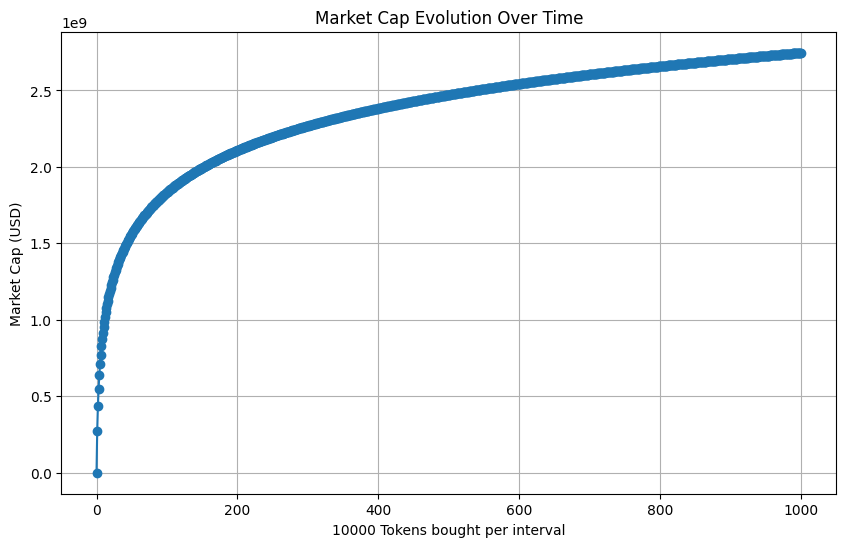

In [162]:
import math
import matplotlib.pyplot as plt

def calculate_final_market_cap(a, b, tokens_purchased, initial_market_cap):
    final_market_cap_exp = math.exp(b * tokens_purchased) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    return final_market_cap

def simulate_market_cap_evolution(a, b, initial_market_cap, tokens_per_interval, num_intervals):
    market_caps = [initial_market_cap]
    current_market_cap = initial_market_cap

    for _ in range(num_intervals):
        current_market_cap = calculate_final_market_cap(a, b, tokens_per_interval, current_market_cap)
        market_caps.append(current_market_cap)

    return market_caps

initial_market_cap = 1000000  # Initial market cap in USD
tokens_per_interval = 10000  # Number of tokens purchased in each interval
num_intervals = 1000  # Number of intervals

# Simulate market cap evolution
market_caps = simulate_market_cap_evolution(a_opt, b_opt, initial_market_cap, tokens_per_interval, num_intervals)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(market_caps, marker='o')
plt.title('Market Cap Evolution Over Time')
plt.xlabel(f'{tokens_per_interval} Tokens bought per interval')
plt.ylabel('Market Cap (USD)')
plt.grid(True)
plt.show()


### Price Evolution with MC

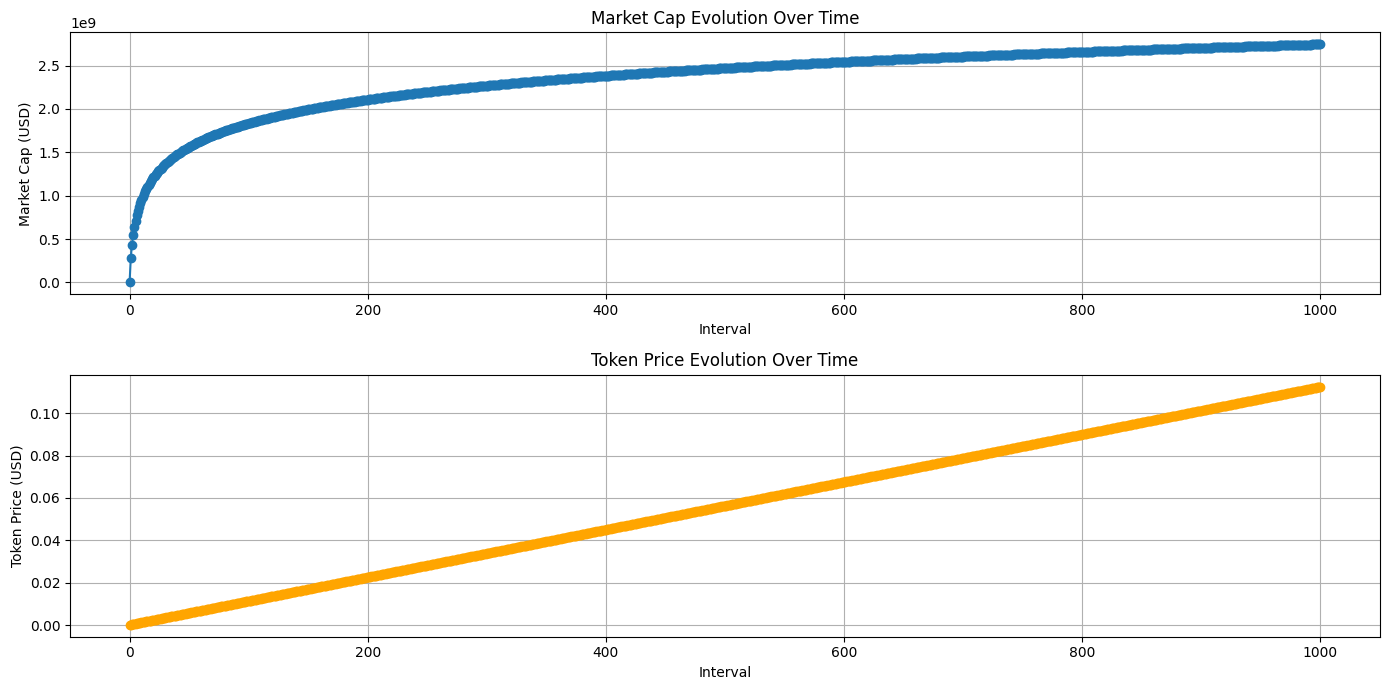

In [163]:
import math
import matplotlib.pyplot as plt

def calculate_final_market_cap(a, b, tokens_purchased, initial_market_cap):
    final_market_cap_exp = math.exp(b * tokens_purchased) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    return final_market_cap

def calculate_token_price(a, b, market_cap):
    return a * math.exp(b * market_cap)

def simulate_market_cap_and_price_evolution(a, b, initial_market_cap, tokens_per_interval, num_intervals):
    market_caps = [initial_market_cap]
    prices = [calculate_token_price(a, b, initial_market_cap)]
    current_market_cap = initial_market_cap

    for _ in range(num_intervals):
        current_market_cap = calculate_final_market_cap(a, b, tokens_per_interval, current_market_cap)
        market_caps.append(current_market_cap)
        prices.append(calculate_token_price(a, b, current_market_cap))

    return market_caps, prices

# Parameters# Simulate market cap and price evolution
market_caps, prices = simulate_market_cap_and_price_evolution(a, b, initial_market_cap, tokens_per_interval, num_intervals)

# Plot the results
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(market_caps, marker='o')
plt.title('Market Cap Evolution Over Time')
plt.xlabel('Interval')
plt.ylabel('Market Cap (USD)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(prices, marker='o', color='orange')
plt.title('Token Price Evolution Over Time')
plt.xlabel('Interval')
plt.ylabel('Token Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Fee revenue Split

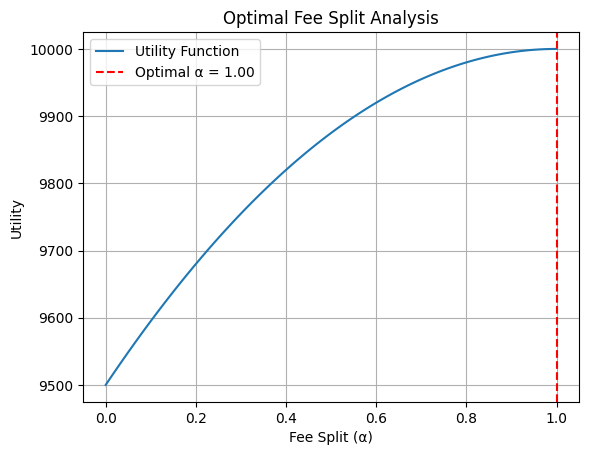

1.0

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def protocol_revenue(alpha, V, f):
    return V * (1 - alpha) * f

def creator_incentive(alpha, V, f):
    return V * alpha * f

def penalty(alpha, k):
    return k * (1 - alpha)**2

def utility(alpha, V, f, k):
    return protocol_revenue(alpha, V, f) + creator_incentive(alpha, V, f) - penalty(alpha, k)

# Parameters
V = 1_000_000  # Total trading volume
f = 0.01  # Trading fee percentage
k = 500 # Penalty constant

# Range of alpha values to evaluate
alpha_values = np.linspace(0, 1, 100)
utility_values = [utility(alpha, V, f, k) for alpha in alpha_values]

# Find the optimal alpha
optimal_alpha = alpha_values[np.argmax(utility_values)]

# Plot the utility function
plt.plot(alpha_values, utility_values, label='Utility Function')
plt.axvline(optimal_alpha, color='r', linestyle='--', label=f'Optimal α = {optimal_alpha:.2f}')
plt.xlabel('Fee Split (α)')
plt.ylabel('Utility')
plt.title('Optimal Fee Split Analysis')
plt.legend()
plt.grid(True)
plt.show()

optimal_alpha


# UserEntry and Exit scenarios

Entry MC: 1000000 USD, Exit MC: 5000000 USD
Tokens purchased: 1729078.55811695
ETH received by selling at exit MC: 1.4528095112358734
Entry price: 0.0010000000000000015 USD
Exit price: 0.0019306977288832614 USD
Price change: 93.06977288832584%
ROI: 45.28095112358734%
---------------------------------------------------
Entry MC: 2000000 USD, Exit MC: 10000000 USD
Tokens purchased: 1496446.8432691111
ETH received by selling at exit MC: 2.9143352627795984
Entry price: 0.0011787686347935905 USD
Exit price: 0.004393970560760839 USD
Price change: 272.75937203149715%
ROI: 191.43352627795986%
---------------------------------------------------
Entry MC: 3000000 USD, Exit MC: 15000000 USD
Tokens purchased: 1291867.8570864731
ETH received by selling at exit MC: 5.819244189748964
Entry price: 0.0013894954943731426 USD
Exit price: 0.01000000000000016 USD
Price change: 619.6856730011609%
ROI: 481.9244189748964%
---------------------------------------------------


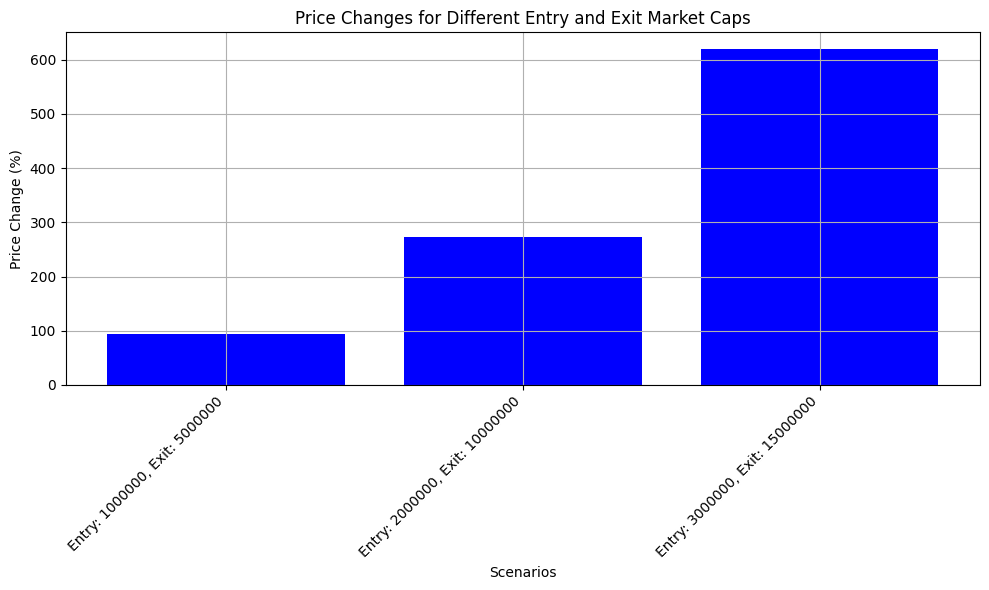

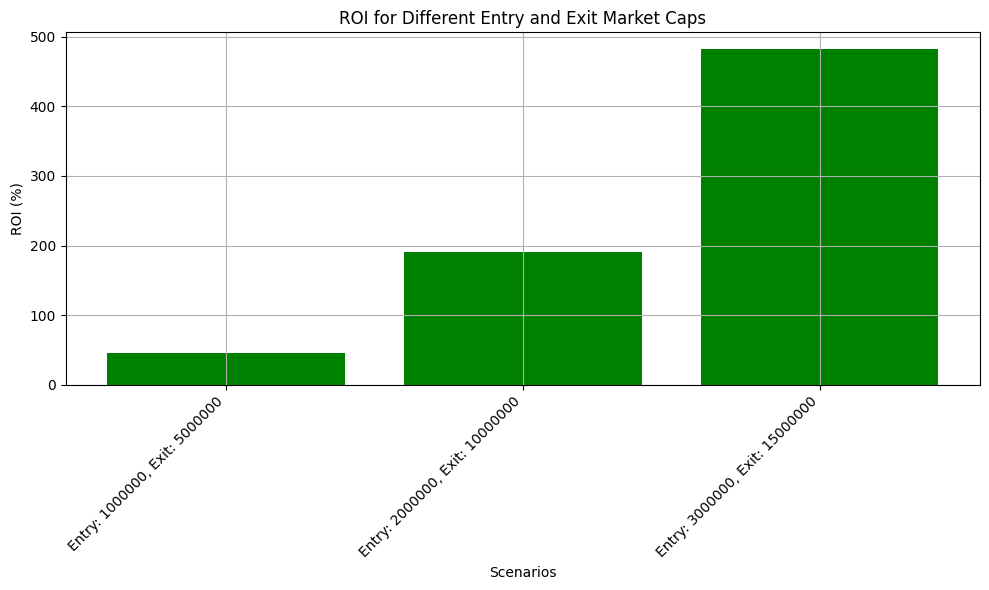

In [49]:
import math
import matplotlib.pyplot as plt

def calculate_final_market_cap(a, b, tokens_purchased, initial_market_cap):
    final_market_cap_exp = math.exp(b * tokens_purchased) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    return final_market_cap

def calculate_token_price(a, b, market_cap):
    return a * math.exp(b * market_cap)

def calculate_tokens_purchased(a, b, eth_amount, eth_price, initial_market_cap):
    usd_value = eth_amount * eth_price
    final_market_cap_exp = (usd_value * b / a) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    tokens_purchased = final_market_cap - initial_market_cap
    return tokens_purchased, final_market_cap

def calculate_eth_received(a, b, tokens_sold, eth_price, initial_market_cap):
    final_market_cap = initial_market_cap - tokens_sold
    usd_value_received = (a / b) * (math.exp(b * initial_market_cap) - math.exp(b * final_market_cap))
    eth_received = usd_value_received / eth_price
    return eth_received

def simulate_entry_exit_scenario(a, b, eth_amount, eth_price, entry_market_cap, exit_market_cap):
    # Calculate tokens purchased at entry market cap
    tokens_purchased, _ = calculate_tokens_purchased(a, b, eth_amount, eth_price, entry_market_cap)
    
    # Calculate ETH received at exit market cap
    eth_received = calculate_eth_received(a, b, tokens_purchased, eth_price, exit_market_cap)
    
    # Calculate price at entry and exit
    entry_price = calculate_token_price(a, b, entry_market_cap)
    exit_price = calculate_token_price(a, b, exit_market_cap)

    roi = ((eth_received - eth_amount) / eth_amount) * 100
    
    return tokens_purchased, eth_received, entry_price, exit_price,roi

# Parameters
a = a_opt # Initial price parameter
b = b_opt  # Aggressiveness parameter
eth_amount = 1  # Amount of ETH used for the trade
eth_price = eth_price  # Price of 1 ETH in USD

# Scenarios to simulate
scenarios = [
    
    (1000000, 5000000),  # Entry at 1M MC, exit at 5M MC
    (2000000, 10000000),  # Entry at 100k MC, exit at 500k MC # Entry at 2M MC, exit at 5M MC
    (3000000, 15000000)  # Entry at 3M MC, exit at 7M MC
]

# Simulate each scenario
results = []
for entry_mc, exit_mc in scenarios:
    tokens_purchased, eth_received, entry_price, exit_price,roi = simulate_entry_exit_scenario(
        a, b, eth_amount, eth_price, entry_mc, exit_mc)
    results.append({
        "entry_mc": entry_mc,
        "exit_mc": exit_mc,
        "tokens_purchased": tokens_purchased,
        "eth_received": eth_received,
        "entry_price": entry_price,
        "exit_price": exit_price,
        "price_change": (exit_price - entry_price) / entry_price * 100,
        "roi":roi
    })

# Display the results
for result in results:
    print(f"Entry MC: {result['entry_mc']} USD, Exit MC: {result['exit_mc']} USD")
    print(f"Tokens purchased: {result['tokens_purchased']}")
    print(f"ETH received by selling at exit MC: {result['eth_received']}")
    print(f"Entry price: {result['entry_price']} USD")
    print(f"Exit price: {result['exit_price']} USD")
    print(f"Price change: {result['price_change']}%")
    print(f"ROI: {result['roi']}%")
    print("---------------------------------------------------")

# Plot the price changes for each scenario
plt.figure(figsize=(10, 6))
price_changes = [result['price_change'] for result in results]
scenarios_labels = [f"Entry: {result['entry_mc']}, Exit: {result['exit_mc']}" for result in results]
plt.bar(scenarios_labels, price_changes, color='blue')
plt.title('Price Changes for Different Entry and Exit Market Caps')
plt.xlabel('Scenarios')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the ROI for each scenario
plt.figure(figsize=(10, 6))
rois = [result['roi'] for result in results]
plt.bar(scenarios_labels, rois, color='green')
plt.title('ROI for Different Entry and Exit Market Caps')
plt.xlabel('Scenarios')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()



Entry MC: 100000 USD, Exit MC: 500000 USD
Tokens purchased: 19801.980198019803
ETH received by selling at exit MC: 4.96039603960396
Entry price: 0.10099999999999999 USD
Exit price: 0.501 USD
Price change: 396.0396039603961%
ROI: 396.03960396039605%
---------------------------------------------------
Entry MC: 1000000 USD, Exit MC: 5000000 USD
Tokens purchased: 1998.0019980019981
ETH received by selling at exit MC: 4.996003996003997
Entry price: 1.001 USD
Exit price: 5.001 USD
Price change: 399.60039960039967%
ROI: 399.60039960039967%
---------------------------------------------------
Entry MC: 2000000 USD, Exit MC: 10000000 USD
Tokens purchased: 999.5002498750625
ETH received by selling at exit MC: 4.99800099950025
Entry price: 2.001 USD
Exit price: 10.001 USD
Price change: 399.800099950025%
ROI: 399.800099950025%
---------------------------------------------------
Entry MC: 3000000 USD, Exit MC: 15000000 USD
Tokens purchased: 666.4445184938354
ETH received by selling at exit MC: 4.99

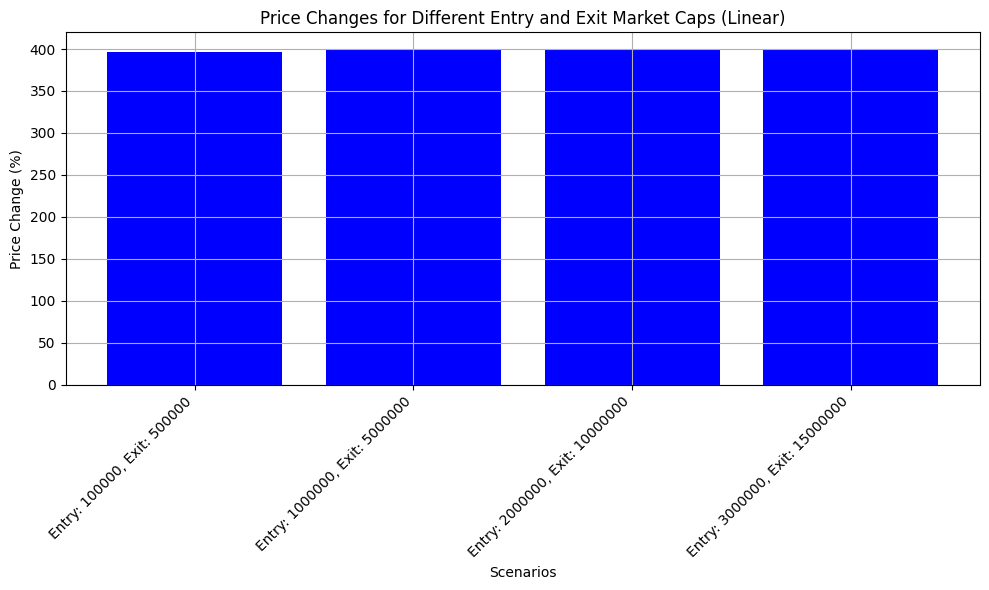

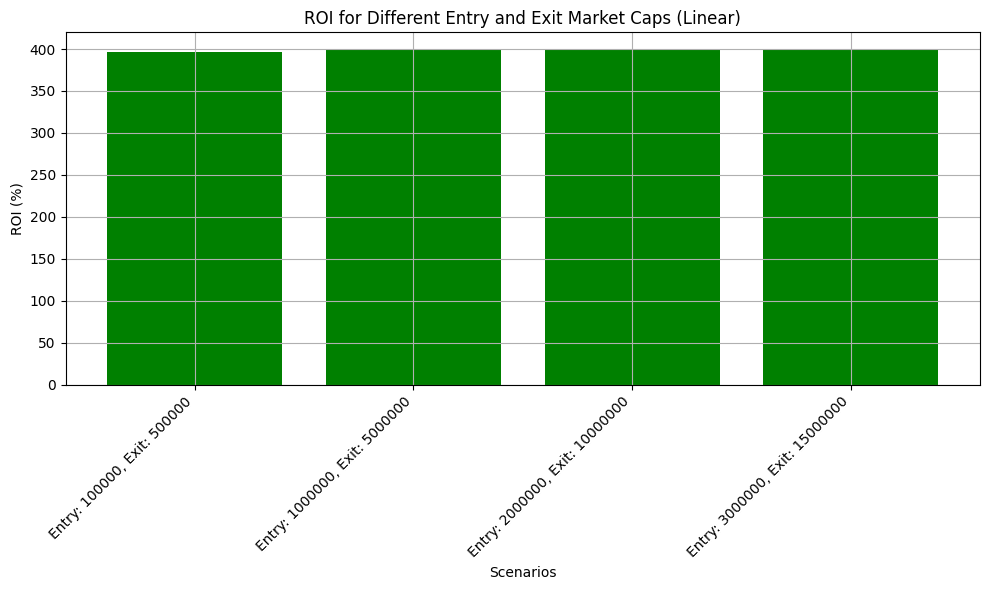

In [50]:
import math
import matplotlib.pyplot as plt

def calculate_tokens_purchased_linear(a, b, eth_amount, eth_price, initial_market_cap):
    usd_value = eth_amount * eth_price
    final_market_cap = initial_market_cap + usd_value
    tokens_purchased = usd_value / (a + b * initial_market_cap)
    return tokens_purchased, final_market_cap

def calculate_eth_received_linear(a, b, tokens_sold, eth_price, initial_market_cap):
    final_market_cap = initial_market_cap - tokens_sold * (a + b * initial_market_cap)
    usd_value_received = tokens_sold * (a + b * initial_market_cap)
    eth_received = usd_value_received / eth_price
    return eth_received

def simulate_entry_exit_scenario_linear(a, b, eth_amount, eth_price, entry_market_cap, exit_market_cap):
    # Calculate tokens purchased at entry market cap
    tokens_purchased, final_entry_mc = calculate_tokens_purchased_linear(a, b, eth_amount, eth_price, entry_market_cap)
    
    # Calculate ETH received at exit market cap
    eth_received = calculate_eth_received_linear(a, b, tokens_purchased, eth_price, exit_market_cap)
    
    # Calculate price at entry and exit
    entry_price = calculate_token_price_linear(a, b, entry_market_cap)
    exit_price = calculate_token_price_linear(a, b, exit_market_cap)

    roi = ((eth_received - eth_amount) / eth_amount) * 100
    
    return tokens_purchased, eth_received, entry_price, exit_price, roi

def calculate_token_price_linear(a, b, market_cap):
    return a + b * market_cap

# Parameters for linear curve
a_linear = 0.001  # Initial price parameter for linear curve
b_linear = 0.000001  # Linear rate of increase in price per market cap unit

# Scenarios to simulate
scenarios = [
    (100000, 500000),  # Entry at 100k MC, exit at 500k MC
    (1000000, 5000000),  # Entry at 1M MC, exit at 5M MC
    (2000000, 10000000),  # Entry at 2M MC, exit at 10M MC
    (3000000, 15000000)  # Entry at 3M MC, exit at 15M MC
]

# Simulate each scenario for linear bonding curve
results_linear = []
for entry_mc, exit_mc in scenarios:
    tokens_purchased, eth_received, entry_price, exit_price, roi = simulate_entry_exit_scenario_linear(
        a_linear, b_linear, eth_amount, eth_price, entry_mc, exit_mc)
    results_linear.append({
        "entry_mc": entry_mc,
        "exit_mc": exit_mc,
        "tokens_purchased": tokens_purchased,
        "eth_received": eth_received,
        "entry_price": entry_price,
        "exit_price": exit_price,
        "price_change": (exit_price - entry_price) / entry_price * 100,
        "roi": roi
    })

# Display the results for linear curve
for result in results_linear:
    print(f"Entry MC: {result['entry_mc']} USD, Exit MC: {result['exit_mc']} USD")
    print(f"Tokens purchased: {result['tokens_purchased']}")
    print(f"ETH received by selling at exit MC: {result['eth_received']}")
    print(f"Entry price: {result['entry_price']} USD")
    print(f"Exit price: {result['exit_price']} USD")
    print(f"Price change: {result['price_change']}%")
    print(f"ROI: {result['roi']}%")
    print("---------------------------------------------------")

# Plot the price changes for each scenario for linear curve
plt.figure(figsize=(10, 6))
price_changes_linear = [result['price_change'] for result in results_linear]
scenarios_labels = [f"Entry: {result['entry_mc']}, Exit: {result['exit_mc']}" for result in results_linear]
plt.bar(scenarios_labels, price_changes_linear, color='blue')
plt.title('Price Changes for Different Entry and Exit Market Caps (Linear)')
plt.xlabel('Scenarios')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the ROI for each scenario for linear curve
plt.figure(figsize=(10, 6))
rois_linear = [result['roi'] for result in results_linear]
plt.bar(scenarios_labels, rois_linear, color='green')
plt.title('ROI for Different Entry and Exit Market Caps (Linear)')
plt.xlabel('Scenarios')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
